In [1]:
import numpy as np # For numerical fast numerical calculations
import matplotlib.pyplot as plt # For making plots
import pandas as pd # Deals with data # Makes beautiful plots
from sklearn import preprocessing # Testing sklearn
import tensorflow # Imports tensorflow
import keras # Imports keras
import csv 
import copy 
import os
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.layers import Input
from keras import optimizers
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
dataPath = "/Users/ASDERTY/Documents/date IA/"
path = '/Users/ASDERTY/Documents/date IA/train/'
pathTest = '/Users/ASDERTY/Documents/date IA/test/'
testedFile = []
train_images = []
test_images = []
#np.concatenate((test_images[x],[[0,0,0],[0,0,0]]),axis = 0)
train_labels = np.array(pd.read_csv("/Users/ASDERTY/Documents/date IA/"+ "train_labels.csv", header=None),dtype = 'uint8')
for root,dirs,files in os.walk(path):
    for x in files:
        train_image = (np.array(pd.read_csv(path + x, header=None),dtype='object'))
        #for i in range(train_image.shape[0],159):                                         
            #train_image= np.concatenate((train_image,[train_image[i-1]]),axis = 0)                  
        train_image = np.array(train_image)
        train_image = train_image[:136]
        train_image = train_image.flatten()
        train_images.append((train_image))
for root,dirs,files in os.walk(pathTest):
    testedFiles = files
    for x in files:
        test_image = (np.array(pd.read_csv(pathTest + x, header=None),dtype='object'))
        #for i in range(test_image.shape[0],159):
            #test_image= np.concatenate((test_image,[test_image[i-1]]),axis = 0)    #same as above, only that the test files                                 #have a max value of 159 of data
        test_image  = np.array(test_image)
        test_image = test_image[:136]
        test_image = test_image.flatten()
        test_images.append((test_image))

train_images = np.array(train_images)
test_images = np.array(test_images)
print(train_images.shape)
print(test_images.shape)
filesGood = []
for x in testedFiles:
    filesGood.append(x.replace('.csv',''))

(9000, 408)
(5000, 408)


<class 'float'>


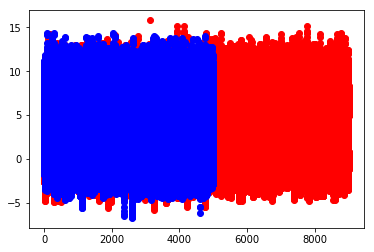

In [3]:
print(type(train_images[0][0]))
#plt.plot(train_images[0],'ro')
#plt.plot(train_images[1],'bo')
#plt.plot(train_images[2],'go')         #checking the data and plot it to see a pattern on the train_data
#plt.plot(train_images[3],'co')
plt.plot(train_images,'ro')
plt.plot(test_images,'bo')
plt.show()

In [4]:
def normalize_data(test_data,type):
    if type == 'standard':
        scaler = preprocessing.StandardScaler()       #methods of normalization of data
        scaler.fit(test_data)
        scaled_test_data = scaler.transform(test_data)
    elif type == 'min_max':
        scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
        scaler.fit(test_data)
        scaled_test_data = scaler.transform(test_data)
    elif type == "l1":
        scaled_test_data = test_data/np.expand_dims(np.sum(abs(test_data),axis = 0),axis = 0)
    elif type == "l2":
        scaled_test_data = test_data/np.expand_dims(np.sqrt(np.sum(test_data**2,axis = 0)), axis = 0 )
    return scaled_test_data

C:\Users\ASDERTY\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ASDERTY\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ASDERTY\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ASDERTY\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


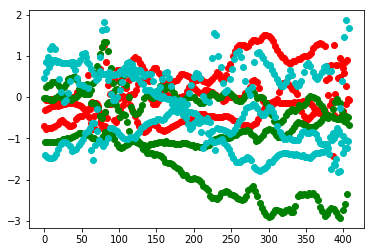

[[-0.68896632 -0.31463093 -0.06413251 ...  0.89784256 -0.04116646
  -0.07188183]
 [-1.10113347 -0.56945138  0.82999875 ...  1.31668646  0.32875777
   0.93447276]
 [-0.02949837 -1.0755175   0.2492261  ... -2.34193328 -0.47241699
  -0.67822492]
 ...
 [ 1.24712523 -1.44932189  1.88846692 ...  0.13103545  0.06235416
   0.46843479]
 [ 0.98304677  0.46770162 -0.95296256 ...  0.75894364  0.00789508
  -1.33518961]
 [-0.48835322  0.34514291 -0.7244235  ...  1.03960513  0.46858335
  -0.26280854]]


In [5]:
scaled_data = copy.deepcopy(train_images)
scaled_test = copy.deepcopy(test_images)
scaled_data = normalize_data(scaled_data,'standard')           #making a deep copy to have it unique to normalize
scaled_test = normalize_data(scaled_test,'standard')
plt.plot(scaled_data[0],'ro')
plt.plot(scaled_data[2],'go')
plt.plot(scaled_data[3],'co')
plt.show()
print(scaled_data)

In [81]:
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import Dropout
model = Sequential ([
    Dense(90,activation = tensorflow.nn.relu,input_shape=(408,)),
    BatchNormalization(),
    Activation(tensorflow.nn.tanh),
    Dropout(0.1),
    Dense(180,activation = tensorflow.nn.relu),
    BatchNormalization(),
    Dropout(0.1),
    Dense(180,activation = tensorflow.nn.sigmoid),
    BatchNormalization(),
    Dense(100,activation = tensorflow.nn.tanh),
    Dense(21, activation = 'softmax')
])

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 90)                36810     
_________________________________________________________________
batch_normalization_43 (Batc (None, 90)                360       
_________________________________________________________________
activation_15 (Activation)   (None, 90)                0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 90)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 180)               16380     
_________________________________________________________________
batch_normalization_44 (Batc (None, 180)               720       
_________________________________________________________________
dropout_30 (Dropout)         (None, 180)               0         
__________

In [83]:
from time import time
from keras.callbacks import TensorBoard
from keras import losses
model.compile(optimizers.Nadam(lr=.001),loss=losses.poisson,metrics = ['accuracy'])
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [84]:
from keras.utils import to_categorical
model.fit(scaled_data[:3000],to_categorical(train_labels[:3000,[1]].flatten()),validation_split=0.2,batch_size=72,epochs = 80,shuffle = True,verbose = 1,callbacks = [tensorboard])

Train on 2400 samples, validate on 600 samples
Epoch 1/80
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1384 - acc: 0.4158 - val_loss: 0.1090 - val_acc: 0.5467
Epoch 2/80
2400/2400 [==============================] - 1s 323us/step - loss: 0.0968 - acc: 0.6633 - val_loss: 0.0963 - val_acc: 0.6367
Epoch 3/80
2400/2400 [==============================] - 1s 317us/step - loss: 0.0871 - acc: 0.7196 - val_loss: 0.0892 - val_acc: 0.6983
Epoch 4/80
2400/2400 [==============================] - 1s 325us/step - loss: 0.0795 - acc: 0.7833 - val_loss: 0.0860 - val_acc: 0.7167
Epoch 5/80
2400/2400 [==============================] - 1s 311us/step - loss: 0.0743 - acc: 0.8212 - val_loss: 0.0820 - val_acc: 0.7533
Epoch 6/80
2400/2400 [==============================] - 1s 323us/step - loss: 0.0708 - acc: 0.8462 - val_loss: 0.0805 - val_acc: 0.7633
Epoch 7/80
2400/2400 [==============================] - 1s 327us/step - loss: 0.0688 - acc: 0.8642 - val_loss: 0.0772 - val_acc: 0.7833
Epo

2400/2400 [==============================] - 1s 355us/step - loss: 0.0506 - acc: 0.9779 - val_loss: 0.0775 - val_acc: 0.8250
Epoch 61/80
2400/2400 [==============================] - 1s 317us/step - loss: 0.0500 - acc: 0.9821 - val_loss: 0.0771 - val_acc: 0.8233
Epoch 62/80
2400/2400 [==============================] - 1s 320us/step - loss: 0.0501 - acc: 0.9829 - val_loss: 0.0758 - val_acc: 0.8383
Epoch 63/80
2400/2400 [==============================] - 1s 325us/step - loss: 0.0498 - acc: 0.9871 - val_loss: 0.0763 - val_acc: 0.8367
Epoch 64/80
2400/2400 [==============================] - 1s 320us/step - loss: 0.0498 - acc: 0.9842 - val_loss: 0.0756 - val_acc: 0.8300
Epoch 65/80
2400/2400 [==============================] - 1s 321us/step - loss: 0.0496 - acc: 0.9896 - val_loss: 0.0758 - val_acc: 0.8417
Epoch 66/80
2400/2400 [==============================] - 1s 327us/step - loss: 0.0496 - acc: 0.9871 - val_loss: 0.0757 - val_acc: 0.8350
Epoch 67/80
2400/2400 [==============================

In [85]:
rounded_predictions = model.predict_classes(scaled_data,verbose = 0)

In [86]:
import sklearn.metrics as metrics
print(rounded_predictions)
print(train_labels[:,[1]].flatten())
print(metrics.accuracy_score(train_labels[:,[1]],rounded_predictions))

[ 7 13  6 ...  3 13 18]
[ 7 13  6 ...  3  3 18]
0.8712222222222222


In [75]:
rounded_predictions = model.predict_classes(scaled_test,verbose = 0)

### 

In [76]:
print(rounded_predictions)
print(dataPath)
print(len(rounded_predictions))
with open(dataPath + 'prezic.csv', mode='w', newline='') as sm: #creating a file for the test data 
    writer = csv.writer(sm, delimiter=',')
    writer.writerow(['id', 'class'])
    for i in range(5000):
        writer.writerow([filesGood[i],rounded_predictions[i]])

[ 3  2  5 ... 20  5  1]
/Users/ASDERTY/Documents/date IA/
5000
